# Problem 7

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('iris.data', header=None)
df.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
headers = np.unique(df[4])
print(headers)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
setosa = df[df[4] == headers[0]].drop(4, axis=1)
versicolor = df[df[4] == headers[1]].drop(4, axis=1)

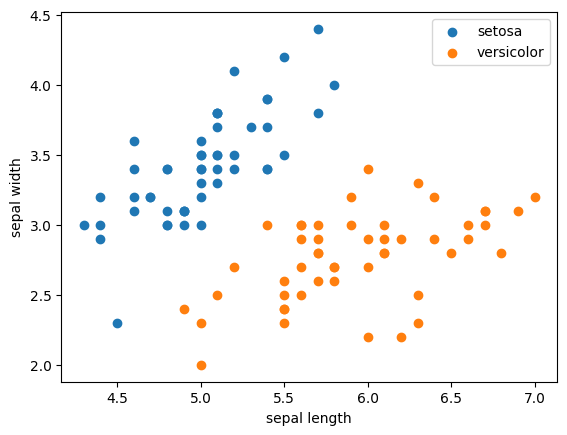

In [5]:
plt.scatter(setosa[0], setosa[1])
plt.scatter(versicolor[0], versicolor[1])
plt.legend(['setosa', 'versicolor'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
class Perceptron:

    def fit(self, X, y, epochs, r=0.1):
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0

        for epoch in range(epochs):
            changed = False
            for i in range(X.shape[0]):
                if y[i] * (np.dot(X[i], self.w) + self.b) <= 0:
                    self.w += r * (y[i]*X[i]).reshape((X.shape[1], 1))
                    self.b += y[i]
                    changed = True

            if not changed:
                return

    def predict(self, X):
        yp = 2*(np.dot(X, self.w) + self.b >= 0) - 1
        return yp.squeeze()

In [7]:
X = df[df[4] != headers[2]].drop([2, 3, 4], axis=1).to_numpy()
y = np.sign((df[df[4] != headers[2]][4] == headers[0]).to_numpy() - 0.5)

In [8]:
p = Perceptron()
p.fit(X, y, 400)

In [9]:
yp = p.predict(X)
accuracy = np.sum(yp == y) / y.shape[0]
print("accuracy : {:.0f} %".format(accuracy*100))

accuracy : 100 %


In [10]:
c0 = -p.b / p.w[1]
c1 = -p.w[0] / p.w[1]

x1 = np.arange(4.3, 7, 0.1)
x2 = c1*x1 + c0

print('c0 = {:.2f}'.format(float(c0)))
print('c1 = {:.2f}'.format(float(c1)))

c0 = -1.43
c1 = 0.82


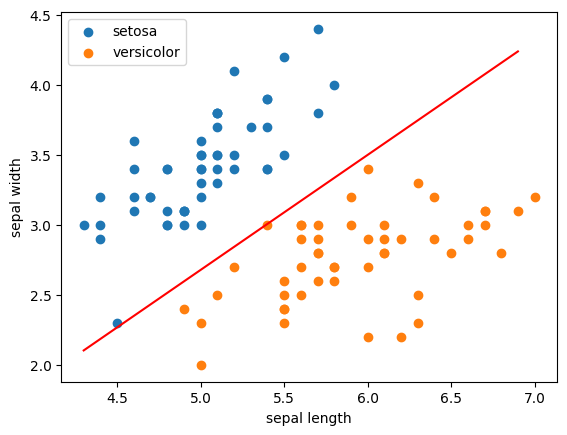

In [11]:
plt.scatter(setosa[0], setosa[1])
plt.scatter(versicolor[0], versicolor[1])
plt.plot(x1, x2, color='r')
plt.legend(['setosa', 'versicolor'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()